In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cette cellule fonctionne uniquement sur Google Collab, le dataset doit être importé à la main sur Jupyter
!wget https://perso.esiee.fr/~gueurett/Time_Series/household_power_consumption.txt

In [122]:
# Lecture de notre dataset, le delimiter est ';'
data = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
data.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [123]:
# Nous allons fusionner les colonnes Date et Date avec d'avoir une collone index universelle. Nous allons aussi en profiter pour effacer les colonnes Date et Time.
data['DateTime'] = data['Date'] + " " + data['Time']
data = data.drop(['Date', 'Time'], axis=1)
data.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00
5,3.520,0.522,235.020,15.000,0.000,2.000,17.0,16/12/2006 17:29:00
6,3.702,0.520,235.090,15.800,0.000,1.000,17.0,16/12/2006 17:30:00
7,3.700,0.520,235.220,15.800,0.000,1.000,17.0,16/12/2006 17:31:00
8,3.668,0.510,233.990,15.800,0.000,1.000,17.0,16/12/2006 17:32:00
9,3.662,0.510,233.860,15.800,0.000,2.000,16.0,16/12/2006 17:33:00


In [124]:
# /!\ CELLULE A GARDER OU NON
# Nous avons parfois des données manquantes, dans ces cas-là, un '?' est placé à la place de la donnée. Nous allons supprimer ces colonnes
data = data[data.Global_active_power != '?']
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0,26/11/2010 20:58:00
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0,26/11/2010 20:59:00
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0,26/11/2010 21:00:00
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0,26/11/2010 21:01:00


In [125]:
# Nous allons maintenant transformer nos colonnes en type 'float64', et définir la colonne 'DateTime' comme étant la première colonne du DataFrame
data.iloc[:, :-1] = data.iloc[:, :-1].astype('float64')
datetime = data.pop('DateTime')
data.insert(0, 'DateTime', datetime)
data.dtypes

DateTime                  object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

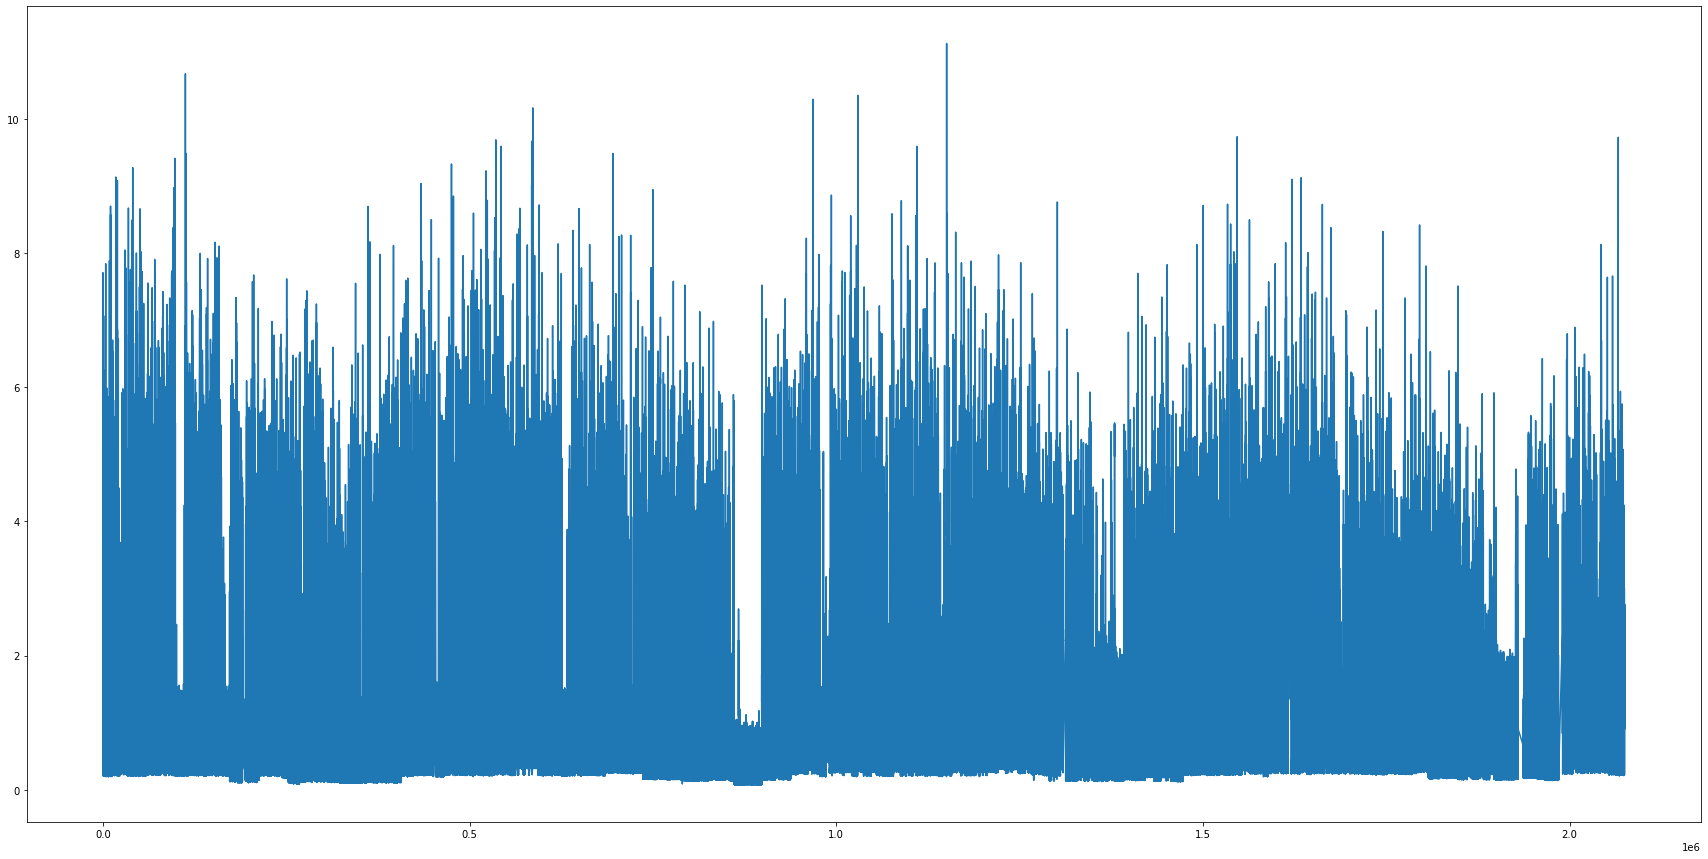

In [130]:
# on affiche l'évolution d'une des colonnes
plt.figure(figsize=(30,15))
plt.plot(data.Global_active_power[:]);